# Set Path of The Test Image

In [1]:
from pathlib import Path

In [2]:
test_image_path = Path("").parent / "test_with_sample_images" / "images" 

# Openning The Test Images

In [3]:
from PIL.Image import open, fromarray

In [4]:
host_image = open(test_image_path / "host_image.png")
watermark_image = open(test_image_path / "watermark.png")

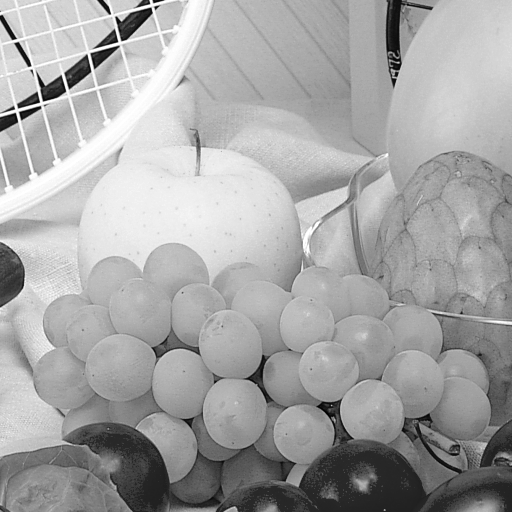

In [5]:
host_image

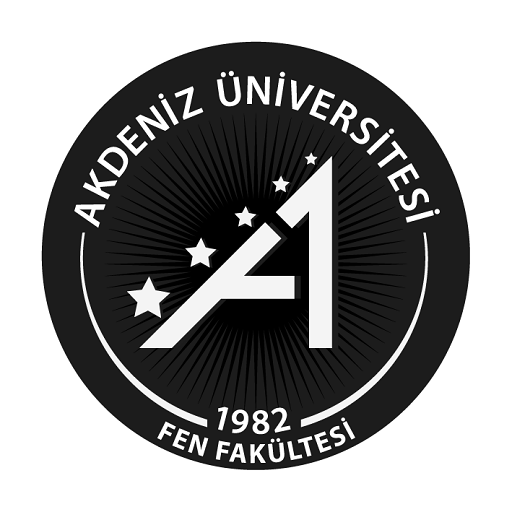

In [6]:
watermark_image

# Converting `PIL` Images to a `numpy` arrays

In [7]:
from numpy import asarray

In [8]:
host_as_array = asarray(host_image)

In [9]:
watermark_as_array = asarray(watermark_image)

# Watermark Embedding

In [10]:
from watermarking.Mohammad2008 import Watermarker

In [11]:
watermarker = Watermarker()

In [12]:
watermarked_image_as_array = watermarker.add_watermark(
    host=host_as_array / (2 ** (8 * host_as_array.dtype.itemsize) - 1),
    watermark=watermark_as_array / (2 ** (8 * watermark_as_array.dtype.itemsize) - 1),
)

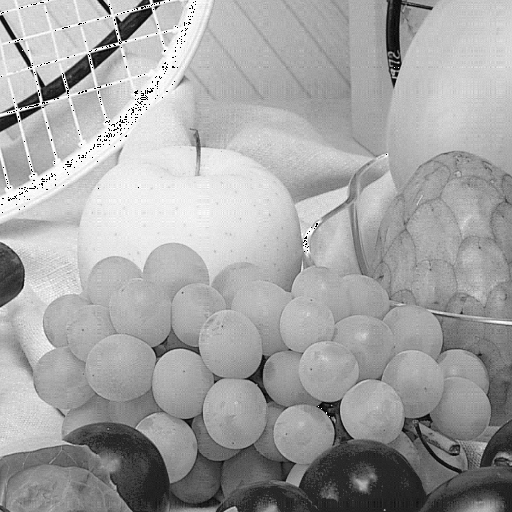

In [13]:
fromarray(
    (watermarked_image_as_array * (2**8 - 1)).astype("uint8"),
)

# Watermark Extraction

In [14]:
extracted_watermark = watermarker.extract_watermark(
    watermarked_image=watermarked_image_as_array
)

In [15]:
Image.fromarray(
    (extracted_watermark * (2**8 - 1)).astype("uint8"),
)

NameError: name 'Image' is not defined

# Some Common Attacs

...

# Measuring The Image Quality

In [ ]:
from numpy import log10, sqrt
from skimage.metrics import structural_similarity

In [ ]:
def MSE(image1, image2):
    return ((image1 - image2) ** 2).mean()

In [ ]:
def PSNR(image1, image2):
    return 10 * log10(1 / MSE(image1, image2))

In [ ]:
def NCC(image1, image2):
    return (image1 * image2).sum() / (sqrt((image1**2).sum()) * sqrt((image2**2).sum()))

In [ ]:
def SSIM(image1, image2):
    return structural_similarity(
        image1,
        image2,
        channel_axis=-1,
        data_range=1.0,
    )